In [1]:
import earthaccess
import xarray as xr
import hvplot.xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import pandas as pd

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
tspan = ("2024-03-01", "2025-03-31")
bbox = (113.338953078, -43.6345972634, 153.569469029, -10.6681857235)

In [4]:
results_land = earthaccess.search_data(
    short_name="PACE_OCI_L3M_LANDVI",
    temporal=tspan,
    bounding_box=bbox,
    granule_name="*.Day.*0p1deg*",  # Daily, 8-day or monthly: Day, 8D or MO | Resolution: 0p1deg or 0.4km
)

In [5]:
paths = earthaccess.open(results_land)
paths

QUEUEING TASKS | :   0%|          | 0/13 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/13 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/13 [00:00<?, ?it/s]

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240301_20240331.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240401_20240430.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240601_20240630.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240701_20240731.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240801_20240831.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240901_20240930.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20241001_20241031.L3m.MO.LANDVI.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20241101_20241130.L3m.M

In [6]:
dataset_land = xr.open_mfdataset(paths,
    combine="nested",
    concat_dim="date"
                                )

In [7]:
dataset_land["mari"] = dataset_land["mari"].clip(
    min=1.3,
    max=2.0
)
dataset_land["cire"] = dataset_land["cire"].clip(
    min=0.5,
    max=2.0
)
dataset_land["car"] = dataset_land["car"].clip(
    min=1.3,
    max=6.2
)

In [8]:
dataset_veg = dataset_land.drop_vars(
    ["palette", "ndvi", "evi", "ndwi", "ndii", "cci", "ndsi", "pri"]
)

In [9]:
dataset_v_norm = dataset_veg.astype(np.float64)
dataset_v_norm = (
    (dataset_veg - dataset_veg.min())
    / (dataset_veg.max() - dataset_veg.min())
)

In [10]:
dataset_land

<xarray.Dataset> Size: 3GB
Dimensions:  (date: 13, lat: 1800, lon: 3600, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: date, rgb, eightbitcolor
Data variables:
    ndvi     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (date, lat, lon) float32 337MB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (date, rgb, eightbitcolor) uint8 10kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.0
    data_bins:                         1714795
    data_minimum:                      -108.14531
    data_maximum:                      89.105576

In [11]:
data_land = dataset_v_norm.to_dataarray()

In [12]:
dataset_v_norm.to_dataarray()

<xarray.DataArray (variable: 3, date: 13, lat: 1800, lon: 3600)> Size: 1GB
dask.array<stack, shape=(3, 13, 1800, 3600), dtype=float32, chunksize=(1, 1, 512, 1024), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon       (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
  * variable  (variable) object 24B 'cire' 'car' 'mari'
Dimensions without coordinates: date

In [13]:
plant_pigments = data_land.sel(
variable = ['mari',  'cire', 'car']
)

In [14]:
num_dates = plant_pigments.sizes['date']
num_dates

13

In [15]:
min_lon, max_lat, max_lon, min_lat = bbox
australia = plant_pigments.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))

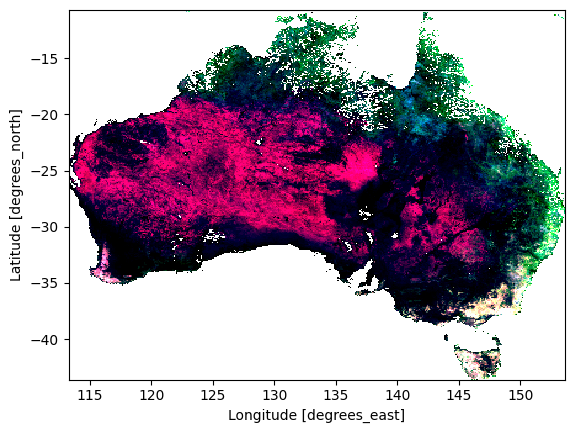

In [16]:
australia[:, 0].plot.imshow()

In [17]:
# # Determine the number of rows and columns
num_dates = australia.shape[1]
num_cols = 3
num_rows = math.ceil(num_dates / num_cols)
# # Create the subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
# axes = axes.flatten()  # Flatten in case it's a 2D array
# # Plot each map
# for i in range(num_dates):
#     ax = axes[i]
#     map_australia = australia[:, i]
#     map_australia.plot.imshow(ax=ax)
#     ax.set_title(f"Month {i+1}")
# plt.tight_layout()
# plt.show()

In [18]:
australia.name = "pigment"
ds_australia = australia.to_dataset()

In [19]:
date_values = pd.date_range(start=tspan[0], periods=ds_australia.dims["date"], freq="M")
ds_australia = ds_australia.assign_coords(date=date_values)

In [20]:
# # ds_australia.hvplot.rgb(x='lon', y='lat', bands='variable', data_aspect=1, flip_yaxis=True, xaxis=False, yaxis=None)
# ds_australia.hvplot.rgb(
#     x='lon', 
#     y='lat', 
#     bands='variable',
#     groupby='date',
#     data_aspect=1, 
#     flip_yaxis=True,
#     xaxis='bottom', 
#     yaxis='left',
#     rasterize=True,
#     dynamic=True 
# )

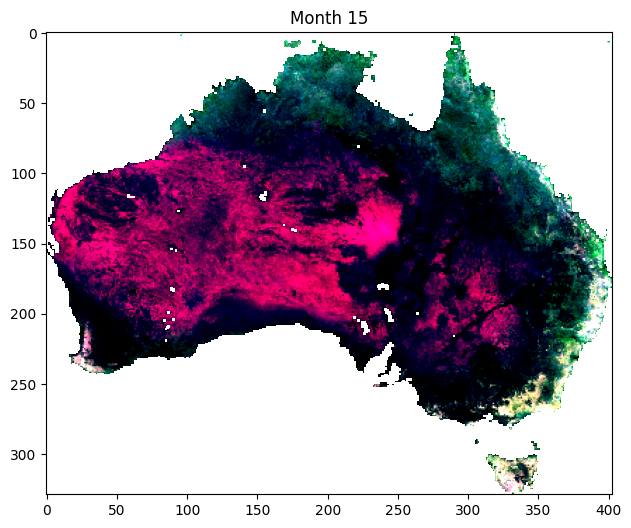

In [21]:
# ANIMATION

num_channels, num_dates, lat_dim, lon_dim = australia.shape

assert num_channels == 3, "Expected 3 variables for RGB"

# Normalize data to [0, 1] for imshow (if needed)
def normalize_rgb(rgb_array):
    """Normalize to [0, 1] per channel if values are not already in that range"""
    rgb_norm = np.empty_like(rgb_array, dtype=np.float32)
    for c in range(3):
        channel = rgb_array[c]
        min_val = np.nanmin(channel)
        max_val = np.nanmax(channel)
        rgb_norm[c] = (channel - min_val) / (max_val - min_val + 1e-8)
    return rgb_norm

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Get first frame RGB image
rgb0 = normalize_rgb(australia[:, 0, :, :])
rgb0 = np.moveaxis(rgb0, 0, -1)  # (3, H, W) → (H, W, 3)

im = ax.imshow(rgb0, animated=True)
title = ax.set_title("Month 3")

# Animation update function
def update(frame):
    rgb = normalize_rgb(australia[:, frame, :, :])
    rgb = np.moveaxis(rgb, 0, -1)  # (3, H, W) → (H, W, 3)
    im.set_data(rgb)
    title.set_text(f"Month {frame + 3}")
    return [im, title]

ani = animation.FuncAnimation(fig, update, frames=num_dates, blit=True, interval=500)

ani.save('australia_rgb_animation.gif', writer='pillow', fps=2)
plt.show()


In [22]:
print('Done!')

Done!
